In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

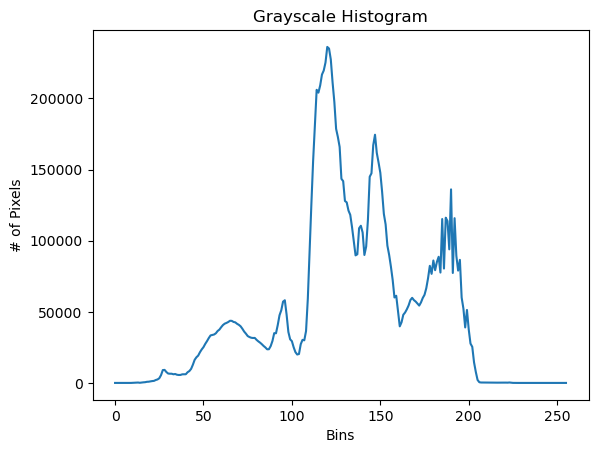

In [ ]:
def thresholding():
    root = os.getcwd()
    imgPath = os.path.join(root, "OneDrive/Desktop/100 days/day 29/IMG_20241029_090721.jpg")
    
    # Check if the image exists
    if not os.path.exists(imgPath):
        print(f"Error: Image not found at {imgPath}")
        return
    
    img = cv.imread(imgPath)
    if img is None:
        print("Error: Could not read the image")
        return
    
    imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Plot histogram
    hist = cv.calcHist([imgGray], [0], None, [256], [0, 256])
    plt.figure()
    plt.plot(hist)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.title("Grayscale Histogram")
    plt.show()

    # Thresholding options
    thresOpt = [
        cv.THRESH_BINARY,
        cv.THRESH_BINARY_INV,
        cv.THRESH_TOZERO,
        cv.THRESH_TOZERO_INV,
        cv.THRESH_TRUNC,
        cv.THRESH_OTSU,
        cv.THRESH_TRIANGLE
    ]
    
    thresNames = [
        'Binary',
        'Binary Inv',
        'ToZero',
        'ToZero Inv',
        'Trunc',
        'Otsu',
        'Triangle'
    ]

    plt.figure(figsize=(12, 6))
    
    # Original image
    plt.subplot(2, 4, 1)
    plt.imshow(imgGray, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Apply each thresholding method
    for i in range(len(thresOpt)):
        plt.subplot(2, 4, i + 2)  # Adjusted subplot index
        
        if thresOpt[i] in [cv.THRESH_OTSU, cv.THRESH_TRIANGLE]:
            # Otsu and Triangle calculate threshold automatically
            _, imgThres = cv.threshold(imgGray, 0, 255, thresOpt[i] | cv.THRESH_BINARY)
        else:
            # Other methods use manual threshold (70)
            _, imgThres = cv.threshold(imgGray, 70, 255, thresOpt[i])
        
        plt.imshow(imgThres, cmap='gray')
        plt.title(thresNames[i])
        plt.axis('off')
    
    plt.tight_layout()
    print(plt.show())

if __name__ == '__main__':
    thresholding()